# use vgg19 network

+ vgg19参数下载地址： [imagenet-vgg-verydeep-19.mat](http://www.vlfeat.org/matconvnet/models/beta16/imagenet-vgg-verydeep-19.mat)

In [1]:
import scipy.io
import numpy as np
import os
import scipy.misc
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
print("packages loaded")

packages loaded


## define network

In [2]:
# vgg19有16个卷积层, 3个全连接层
def net(data_path, input_image):
    layers = (
        'conv1_1', 'relu1_1', 'conv1_2', 'relu1_2', 'pool1', 
        'conv2_1', 'relu2_1', 'conv2_2', 'relu2_2', 'pool2',
        'conv3_1', 'relu3_1', 'conv3_2', 'relu3_2', 'conv3_3',
        'relu3_3', 'conv3_4', 'relu3_4', 'pool3',
        'conv4_1', 'relu4_1', 'conv4_2', 'relu4_2', 'conv4_3',
        'relu4_3', 'conv4_4', 'relu4_4', 'pool4',
        'conv5_1', 'relu5_1', 'conv5_2', 'relu5_2', 'conv5_3',
        'relu5_3', 'conv5_4', 'relu5_4'
    )
    data = scipy.io.loadmat(data_path)
    mean = data['normalization'][0][0][0]
    mean_pixel = np.mean(mean, axis=(0, 1))  #平均像素值，用于预处理
    
    weights = data['layers'][0]
    
    net = {}
    current = input_image
    for i, name in enumerate(layers):
        kind = name[:4]
        if kind == 'conv':
            kernels, bias = weights[i][0][0][0][0]
            # matconvnet: weights are [width, height, in_channels, out_channels]
            # tensorflow: weights are [height, width, in_channels, out_cahnnels]
            kernels = np.transpose(kernels, (1, 0, 2, 3))
            bias = bias.reshape(-1)
            current = _conv_layer(current, kernels, bias)
        elif kind =='relu':
            current = tf.nn.relu(current)
        elif kind == 'pool':
            current = _pool_layer(current)
        net[name] = current
    assert len(net) == len(layers)
    return net, mean_pixel, layers
print("network for bgg ready")    

network for bgg ready


## define functions

In [3]:
def _conv_layer(input, weights, bias):
    conv = tf.nn.conv2d(input, tf.constant(weights), strides=(1, 1, 1, 1), padding='SAME')
    return tf.nn.bias_add(conv, bias)
def _pool_layer(input):
    return tf.nn.max_pool(input, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1), padding='SAME')
def preprocess(image, mean_pixel):
    return image - mean_pixel
def unprocess(image, mean_pixel):
    return image + mean_pixel
def imread(path):
    return scipy.misc.imread(path).astype(np.float)
def imsave(path, img):
    img = np.clip(img, 0, 255).astype(np.uint8)
    scipy.misc.imsave(path, img)
print("function for vgg19 ready")

function for vgg19 ready


## run

[1/36] conv1_1
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 1026, 1368, 64)


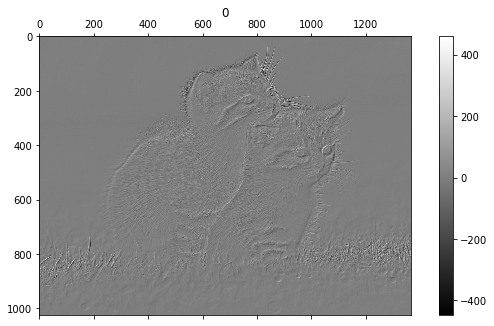

[2/36] relu1_1
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 1026, 1368, 64)


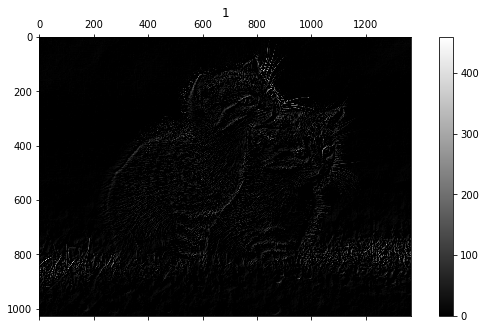

[3/36] conv1_2
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 1026, 1368, 64)


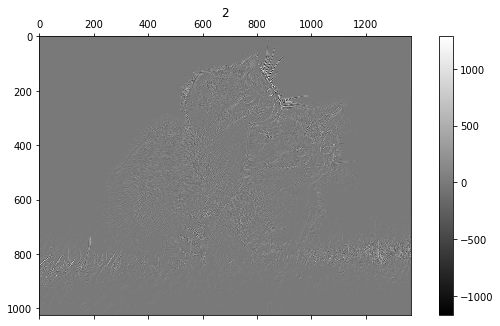

[4/36] relu1_2
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 1026, 1368, 64)


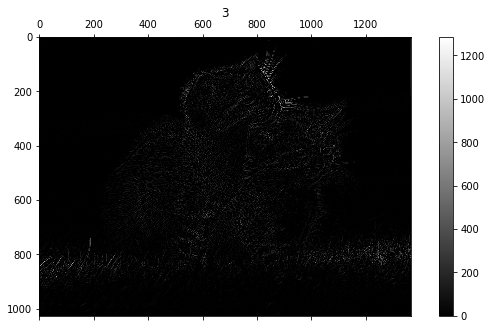

[5/36] pool1
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 513, 684, 64)


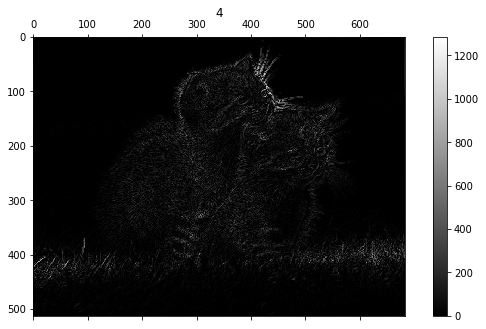

[6/36] conv2_1
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 513, 684, 128)


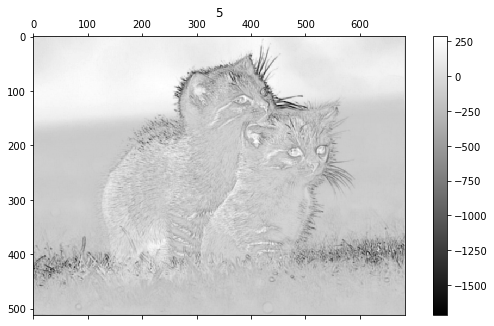

[7/36] relu2_1
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 513, 684, 128)


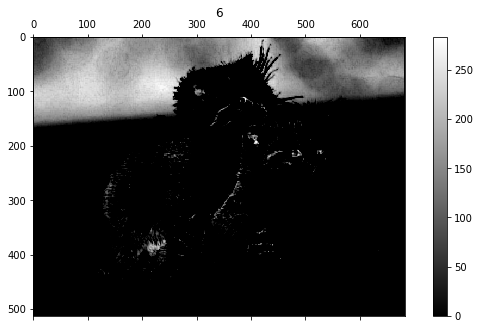

[8/36] conv2_2
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 513, 684, 128)


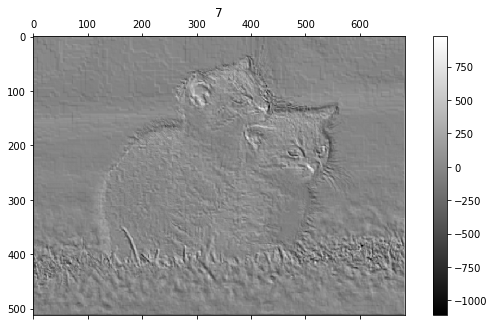

[9/36] relu2_2
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 513, 684, 128)


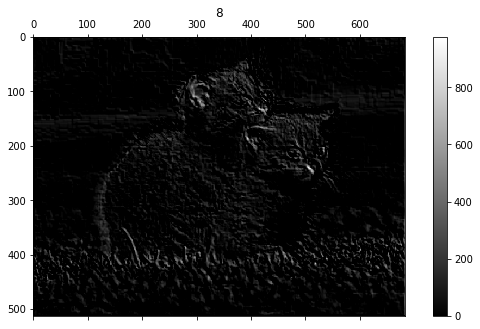

[10/36] pool2
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 257, 342, 128)


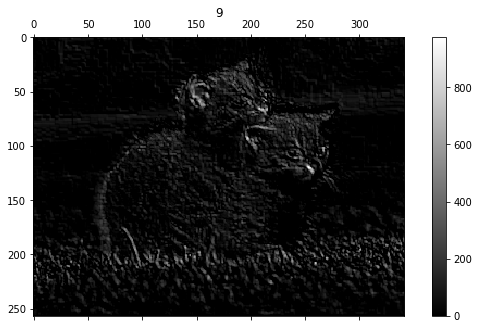

[11/36] conv3_1
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 257, 342, 256)


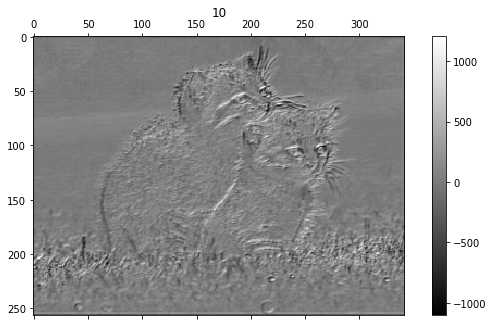

[12/36] relu3_1
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 257, 342, 256)


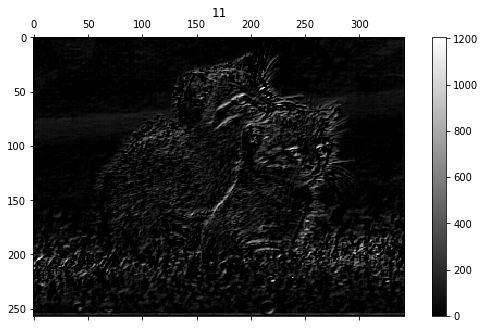

[13/36] conv3_2
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 257, 342, 256)


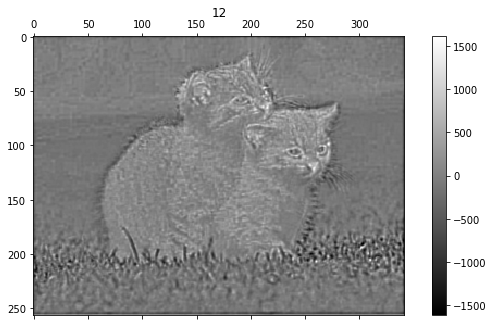

[14/36] relu3_2
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 257, 342, 256)


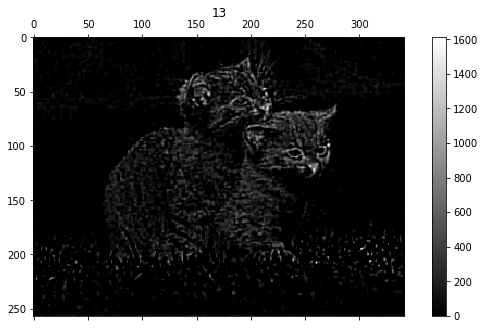

[15/36] conv3_3
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 257, 342, 256)


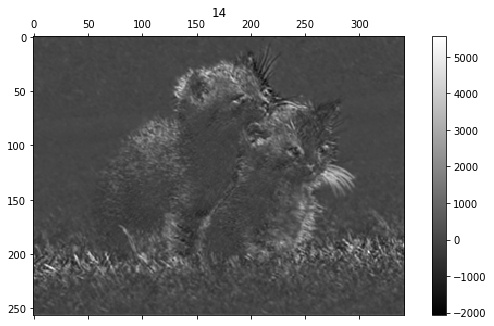

[16/36] relu3_3
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 257, 342, 256)


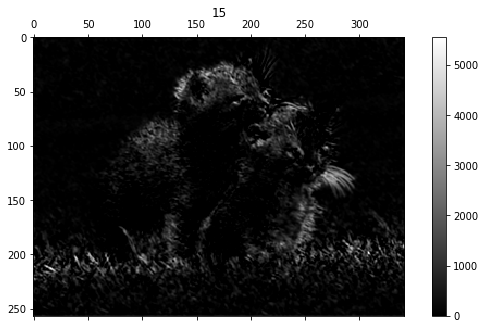

[17/36] conv3_4
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 257, 342, 256)


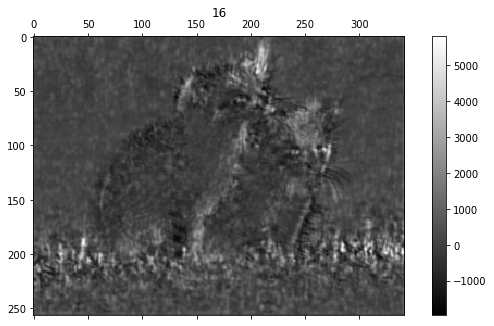

[18/36] relu3_4
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 257, 342, 256)


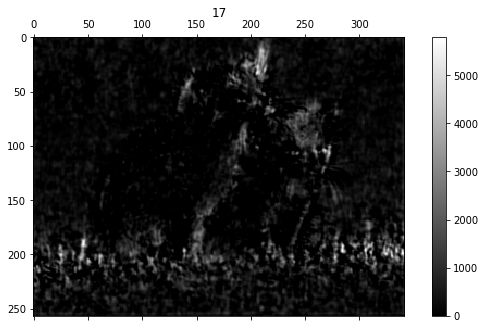

[19/36] pool3
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 129, 171, 256)


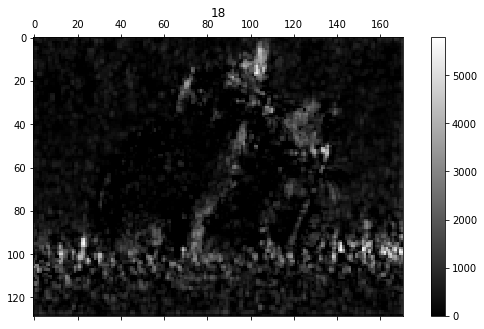

[20/36] conv4_1
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 129, 171, 512)


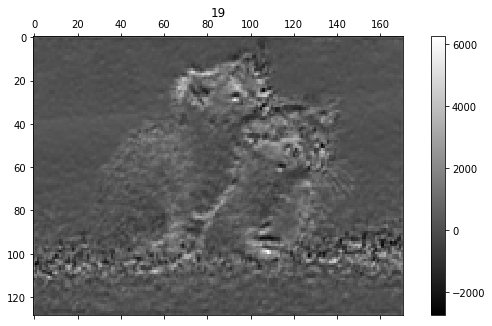

[21/36] relu4_1
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 129, 171, 512)


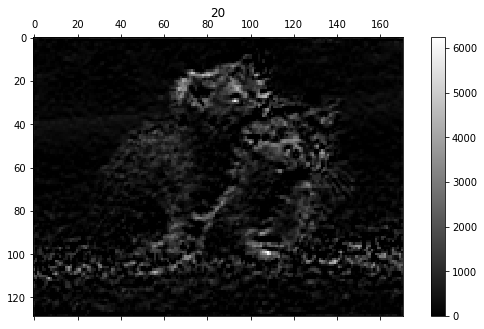

[22/36] conv4_2
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 129, 171, 512)


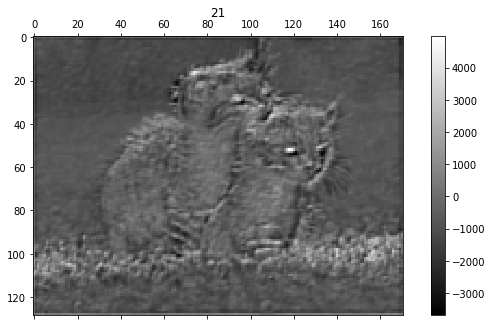

[23/36] relu4_2
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 129, 171, 512)


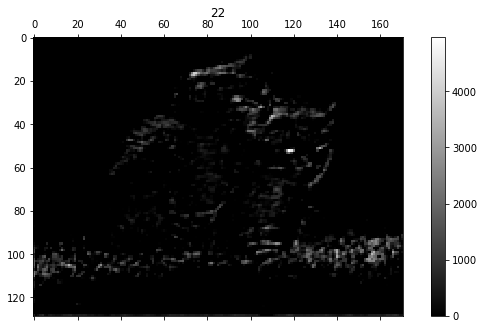

[24/36] conv4_3
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 129, 171, 512)


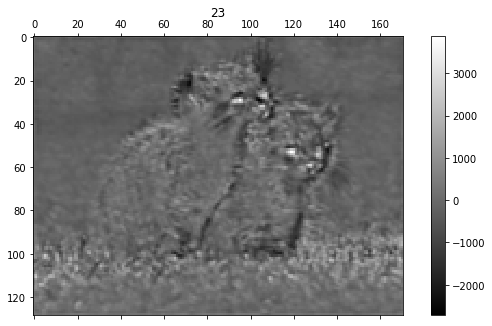

[25/36] relu4_3
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 129, 171, 512)


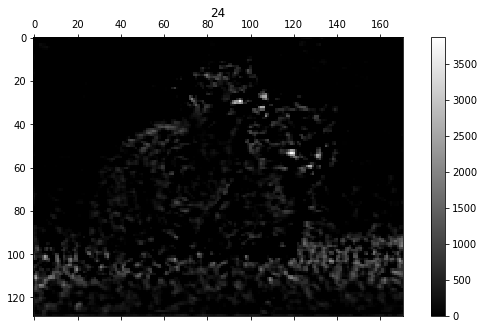

[26/36] conv4_4
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 129, 171, 512)


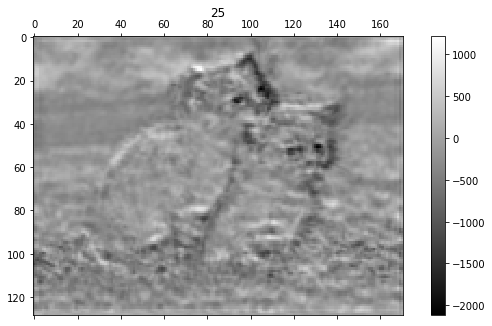

[27/36] relu4_4
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 129, 171, 512)


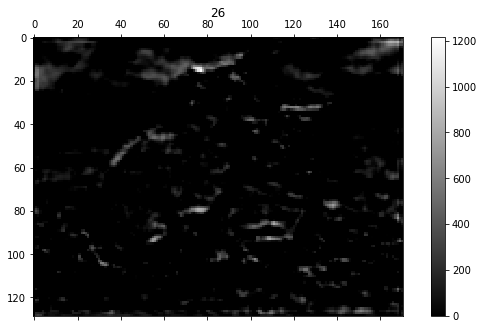

[28/36] pool4
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 65, 86, 512)


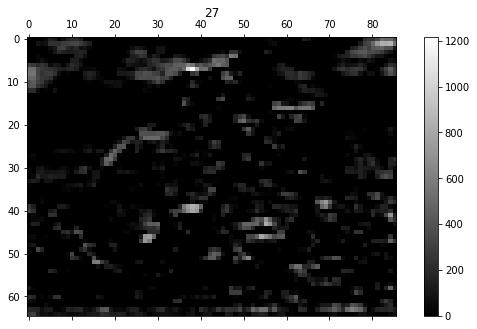

[29/36] conv5_1
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 65, 86, 512)


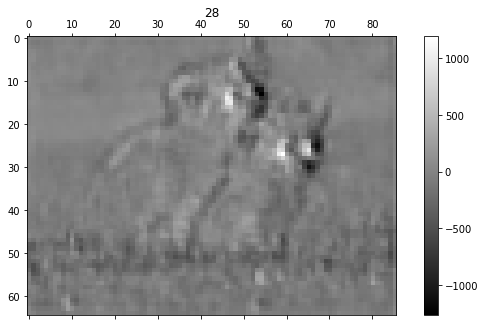

[30/36] relu5_1
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 65, 86, 512)


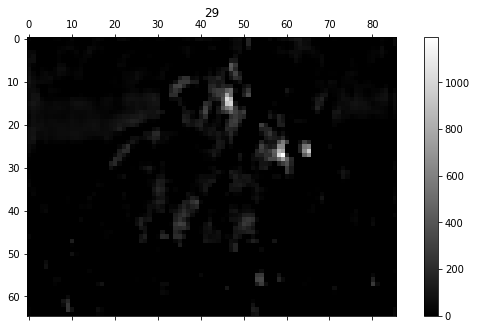

[31/36] conv5_2
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 65, 86, 512)


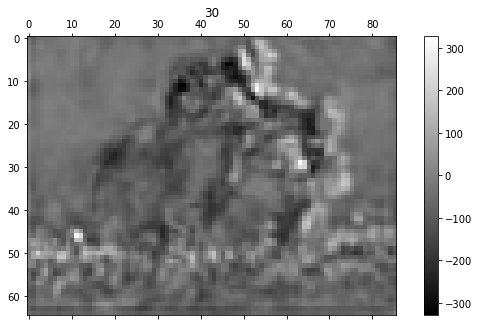

[32/36] relu5_2
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 65, 86, 512)


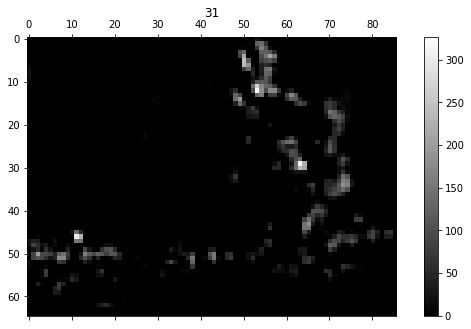

[33/36] conv5_3
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 65, 86, 512)


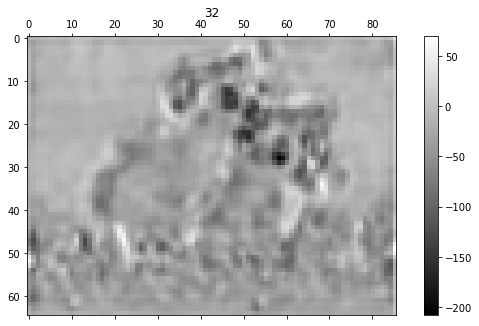

[34/36] relu5_3
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 65, 86, 512)


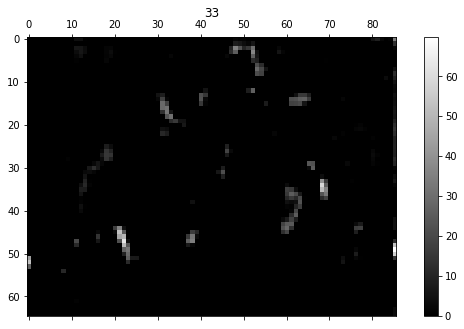

[35/36] conv5_4
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 65, 86, 512)


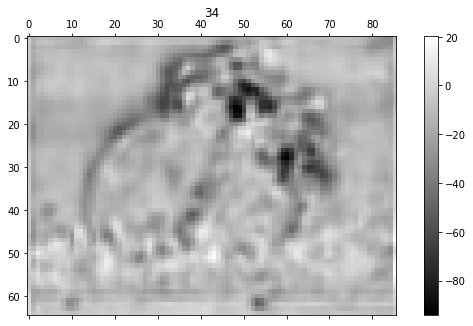

[36/36] relu5_4
type of 'features' is  <class 'numpy.ndarray'>
shape of 'features' is (1, 65, 86, 512)


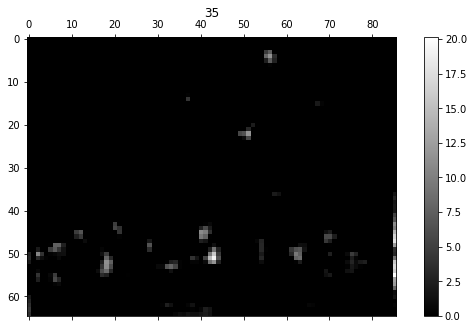

In [6]:
cwd = os.getcwd()
last_dir = os.path.abspath(os.path.join(cwd, os.path.pardir))
vgg_path = last_dir + '/model/imagenet-vgg-verydeep-19.mat'
image_path = last_dir + '/images/cat.jpg'
input_image = imread(image_path)
shape = (1,) + input_image.shape # (h, w, nch) => (1, h, w, nch)

with tf.Graph().as_default(), tf.Session() as sess:
    image = tf.placeholder('float', shape=shape)
    nets, mean_pixel, all_layers = net(vgg_path, image)
    input_image_pre = np.array([preprocess(input_image, mean_pixel)])
    layers = all_layers # for all layers
    # layers = ('relu2_1', 'relu3_1', 'relu4_1)
    for i, layer in enumerate(layers):
        print("[%d/%d] %s" %(i + 1, len(layers), layer))
        features = nets[layer].eval(feed_dict={image: input_image_pre})
        
        print("type of 'features' is ", type(features))
        print("shape of 'features' is %s" %(features.shape, ))
        
        # plot response
        plt.figure(i + 1, figsize=(10, 5))
        plt.matshow(features[0, :, :, 0], cmap=plt.cm.gray, fignum=i + 1)
        plt.title("" + str(i))
        plt.colorbar()
        plt.show()